# DATA UNDERSTANDING

In [ ]:
"""Data Preparation Library"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

"""Models Library"""
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

"""Model Evaluation"""
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

"""Other"""
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
%matplotlib inline
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category = ConvergenceWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Membaca data dari Google Drive. Note: Disesuaikan dengan direktori yang digunakan
dataset = pd.read_csv('/content/drive/MyDrive/tubes/Churn_Modelling.csv')

# Menampilkan variabel dan ukuran data
def display_df(df):
      display(df.head())
      print(df.shape)

display_df(dataset)

Mounted at /content/drive


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


(10000, 14)


In [ ]:
dataset = dataset.drop(columns=["RowNumber","CustomerId","Surname"])
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
pd.DataFrame(dataset.isnull().sum(),columns=["Count"])

,Count
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


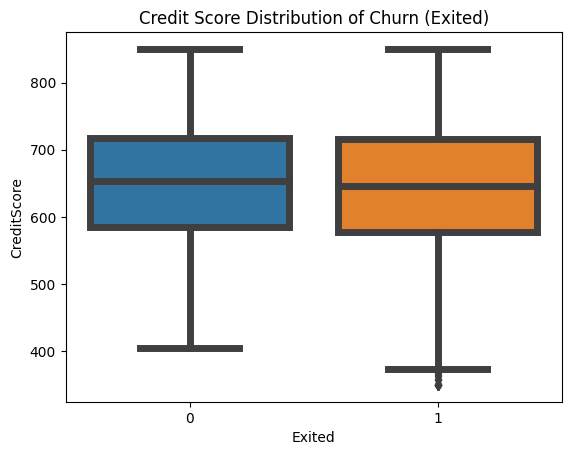

In [ ]:
# Exited -- CreditScore
sns.boxplot( x=dataset["Exited"], y=dataset["CreditScore"], linewidth=5)
plt.title("Credit Score Distribution of Churn (Exited)")
plt.show()

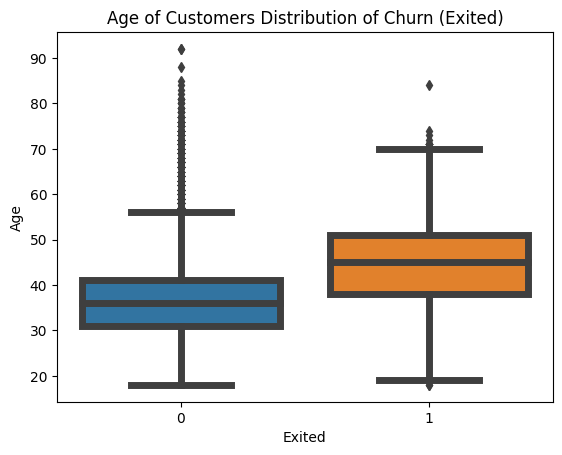

In [ ]:
# Exited -- Age
sns.boxplot( x=dataset["Exited"], y=dataset["Age"], linewidth=5)
plt.title("Age of Customers Distribution of Churn (Exited)")
plt.show()

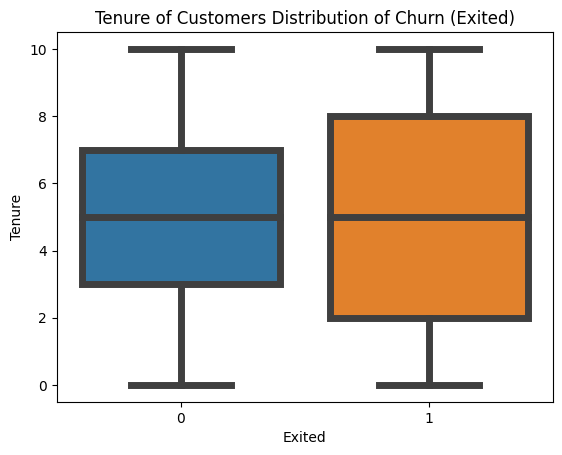

In [ ]:
# Exited -- Tenure
sns.boxplot( x=dataset["Exited"], y=dataset["Tenure"], linewidth=5)
plt.title("Tenure of Customers Distribution of Churn (Exited)")
plt.show()

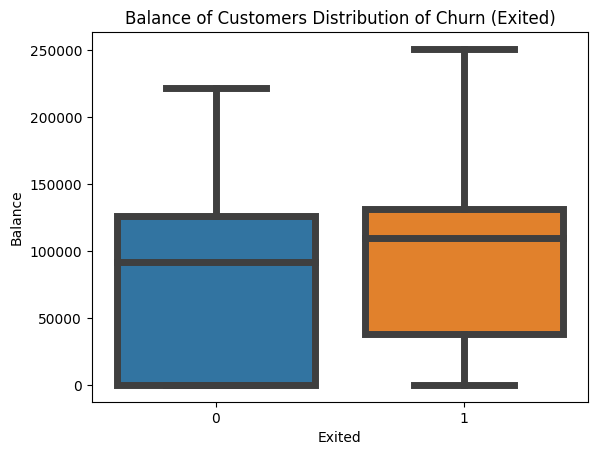

In [ ]:
# Exited -- Balance
sns.boxplot( x=dataset["Exited"], y=dataset["Balance"], linewidth=5)
plt.title("Balance of Customers Distribution of Churn (Exited)")
plt.show()

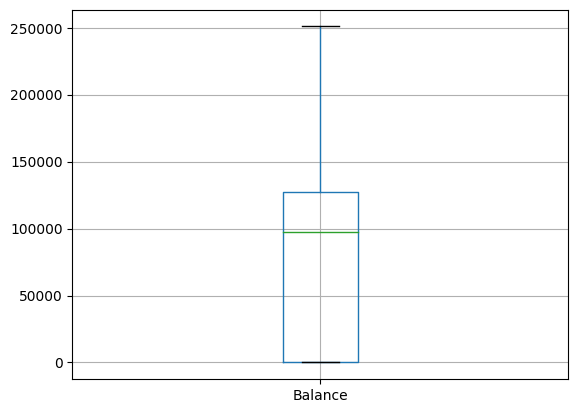

In [ ]:
# Balance boxplot
dataset[["Balance"]].boxplot();

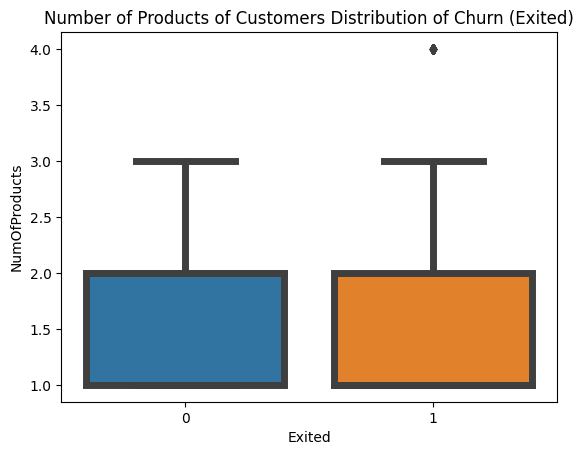

In [ ]:
# Exited -- NumOfProducts
sns.boxplot( x=dataset["Exited"], y=dataset["NumOfProducts"], linewidth=5)
plt.title("Number of Products of Customers Distribution of Churn (Exited)")
plt.show()

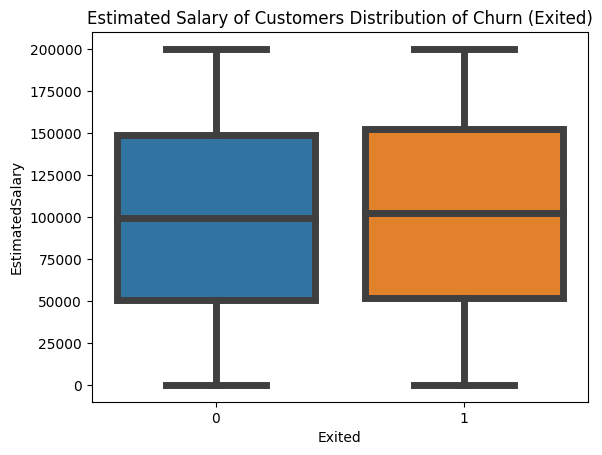

In [ ]:
# Exited -- EstimatedSalary
sns.boxplot( x=dataset["Exited"], y=dataset["EstimatedSalary"], linewidth=5)
plt.title("Estimated Salary of Customers Distribution of Churn (Exited)")
plt.show()

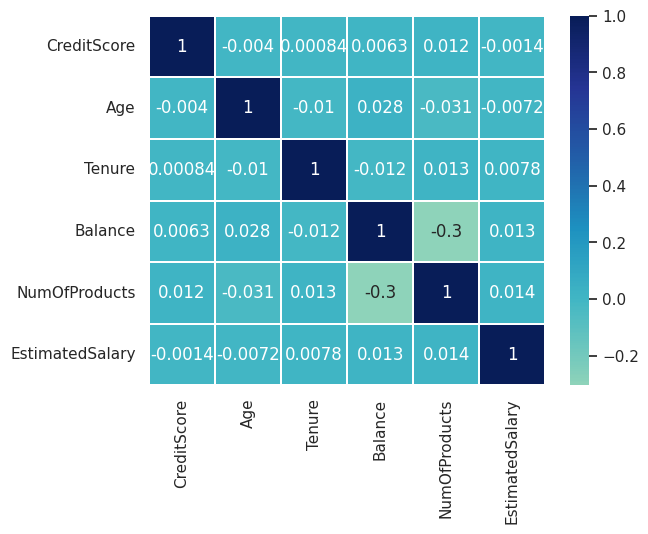

In [ ]:
# Correlation Matrix
correlationColumns = dataset[["CreditScore","Age","Tenure"
    ,"Balance","NumOfProducts","EstimatedSalary"]]

sns.set()
corr = correlationColumns.corr()
ax = sns.heatmap(corr
                 ,center=0
                 ,annot=True
                 ,linewidths=.2
                 ,cmap="YlGnBu")
plt.show()

# DATA PREPARATION

In [ ]:
# Decomposition predictors and target
predictors = dataset.iloc[:,0:10]
target = dataset.iloc[:,10:]

In [ ]:
try:
    predictors['isMale'] = predictors['Gender'].map({'Male':1, 'Female':0})
except:
    pass

In [ ]:
try:
    # Geography one shot encoder
    predictors[['France', 'Germany', 'Spain']] = pd.get_dummies(predictors['Geography'])
    # Removal of unused columns.
    predictors = predictors.drop(columns=['Gender','Geography','Spain'])
except:
    pass

In [ ]:
normalization = lambda x:(x-x.min()) / (x.max()-x.min())
transformColumns = predictors[["Balance","EstimatedSalary","CreditScore"]]
predictors[["Balance","EstimatedSalary","CreditScore"]] = normalization(transformColumns)

# All Predictors Columns
predictors.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,isMale,France,Germany
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,38.921800,5.012800,0.304848,1.530200,0.70550,0.515100,0.500441,0.545700,0.501400,0.250900
std,0.193307,10.487806,2.892174,0.248696,0.581654,0.45584,0.499797,0.287580,0.497932,0.500023,0.433553
min,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,0.254977,0.000000,0.000000,0.000000
50%,0.604000,37.000000,5.000000,0.387402,1.000000,1.00000,1.000000,0.500960,1.000000,1.000000,0.000000
75%,0.736000,44.000000,7.000000,0.508749,2.000000,1.00000,1.000000,0.746955,1.000000,1.000000,1.000000
max,1.000000,92.000000,10.000000,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Train and test splitting
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size=0.25, random_state=0)
pd.DataFrame({"Train Row Count":[x_train.shape[0],y_train.shape[0]],
              "Test Row Count":[x_test.shape[0],y_test.shape[0]]},
             index=["X (Predictors)","Y (Target)"])

,Train Row Count,Test Row Count
X (Predictors),7500,2500
Y (Target),7500,2500


# MODELLING

In [ ]:
# Numpy excaptions handle
y_train = y_train.values.ravel()

In [ ]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)
dtc_acc = accuracy_score(y_test,y_pred_dtc)

# Logistic Regression
logr = LogisticRegression()
logr.fit(x_train,y_train)
y_pred_logr = logr.predict(x_test)
logr_acc = accuracy_score(y_test,y_pred_logr)

# Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
gnb_acc = accuracy_score(y_test,y_pred_gnb)

# K Neighbors Classifier
knn = KNeighborsClassifier( metric='minkowski')
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
knn_acc = accuracy_score(y_test,y_pred_knn)

# Random Forrest
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
rfc_acc = accuracy_score(y_test,y_pred_rfc)

# Neural Network
nnc = MLPClassifier()
nnc.fit(x_train,y_train)
y_pred_nnc = nnc.predict(x_test)
nnc_acc = accuracy_score(y_test,y_pred_nnc)

# Xgboost Classifier
xgboast = xgb.XGBClassifier()
xgboast.fit(x_train, y_train)
xgboast = xgboast.score(x_test,y_test)

pd.DataFrame({"Algorithms":["Decision Tree","Logistic Regression","Naive Bayes","K Neighbors Classifier","Random Ferest","Neural Network","Xgboost Classifier"],
              "Scores":[dtc_acc,logr_acc,gnb_acc,knn_acc,rfc_acc,nnc_acc,xgboast]})

,Algorithms,Scores
0,Decision Tree,0.7960
1,Logistic Regression,0.8060
2,Naive Bayes,0.8096
3,K Neighbors Classifier,0.8272
4,Random Ferest,0.8700
5,Neural Network,0.8516
6,Xgboost Classifier,0.8512


# EVALUATION

In [ ]:
# Cross validation test
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('xgboast', XGBClassifier()))

# evaluate each model in turning kfold results
results_boxplot = []
names = []
results_mean = []
results_std = []
p,t = predictors.values, target.values.ravel()
for name, model in models:
    cv_results = cross_val_score(model, p,t, cv=10)
    results_boxplot.append(cv_results)
    results_mean.append(cv_results.mean())
    results_std.append(cv_results.std())
    names.append(name)
pd.DataFrame({"Algorithm":names,
                                "Accuracy Mean":results_mean,
                                "Accuracy":results_std})

,Algorithm,Accuracy Mean,Accuracy
0,LR,0.8095,0.006975
1,KNN,0.8284,0.009881
2,CART,0.7942,0.012073
3,RFC,0.8639,0.006949
4,NB,0.8205,0.007487
5,SVM,0.7963,0.000458
6,xgboast,0.8549,0.006332


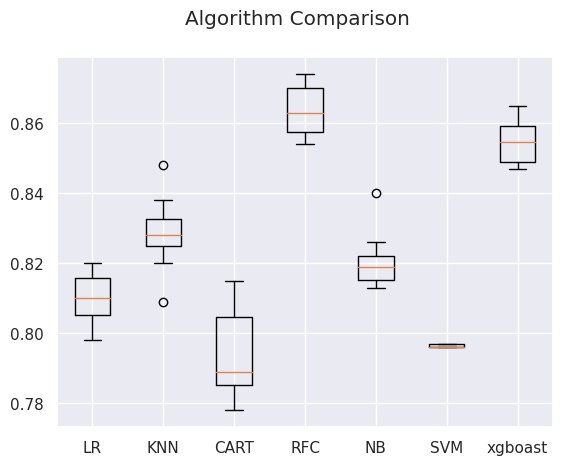

In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_boxplot)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Grid Seach for XGboast
params = {
        'min_child_weight': [1, 2, 3],
        'gamma': [1.9, 2, 2.1, 2.2],
        'subsample': [0.4,0.5,0.6],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3,4,5]
        }
gd_sr = GridSearchCV(estimator=XGBClassifier(),
                     param_grid=params,
                     scoring='accuracy',
                     cv=5,
                     )
gd_sr.fit(predictors, target.values.ravel())
best_parameters = gd_sr.best_params_
pd.DataFrame(best_parameters.values(),best_parameters.keys(),columns=["Best Parameters"])

,Best Parameters
colsample_bytree,0.6
gamma,2.2
max_depth,3.0
min_child_weight,1.0
subsample,0.6


In [ ]:
print("Best score is: ",gd_sr.best_score_)

Best score is:  0.8656


In [ ]:
import pickle